<a href="https://colab.research.google.com/github/lover-swan/project2_2/blob/main/(4)EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
data=pd.read_pickle('/content/drive/MyDrive/project2_2/data_after.pkl')

In [52]:
data.columns

Index(['event_time', 'user_id', 'product_id', 'large_category',
       'small_category', 'brand', 'price', 'target'],
      dtype='object')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   event_time      int32   
 1   user_id         int32   
 2   product_id      int32   
 3   large_category  category
 4   small_category  category
 5   brand           category
 6   price           int16   
 7   target          int8    
dtypes: category(3), int16(1), int32(3), int8(1)
memory usage: 769.2 MB


In [54]:
data.large_category.describe()

count        28933155
unique             13
top       electronics
freq         16135623
Name: large_category, dtype: object

In [55]:
data.small_category.describe()

count       28933155
unique           124
top       smartphone
freq        11507231
Name: small_category, dtype: object

In [56]:
data.brand.describe()

count     36331684
unique        3444
top        samsung
freq       5282775
Name: brand, dtype: object

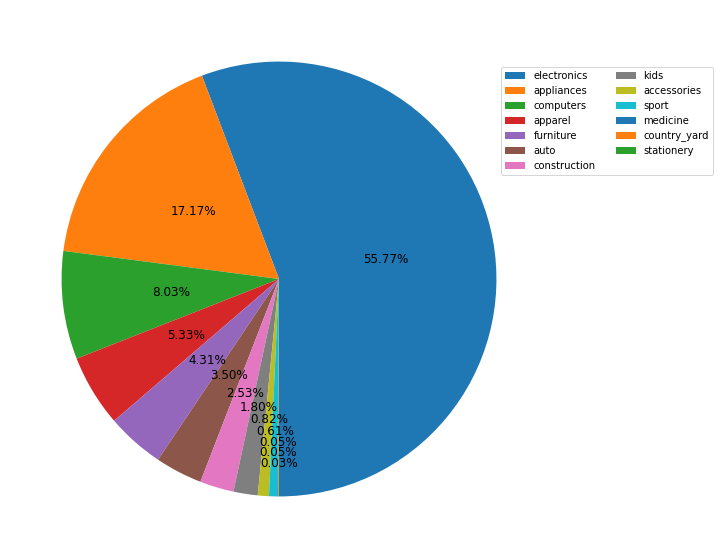

In [81]:
labels = data.large_category.value_counts().index
frequency = data.large_category.value_counts()
 
labels_frequency = zip(labels,frequency) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency]
sorted_frequency = [x[1] for x in labels_frequency]
 
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot()
 
pie = ax.pie(sorted_frequency,
       startangle=270,
       )
 
total = np.sum(frequency)
 
threshold = 4
sum_pct = 0
count_less_5pct = 0
spacing = 0.05
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2
    center, r = ax.patches[i].center, ax.patches[i].r
    
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0]
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1]
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0]
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1]
    
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else:
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],sorted_labels,ncol=2,bbox_to_anchor=(0.9, 0.9))
plt.show()

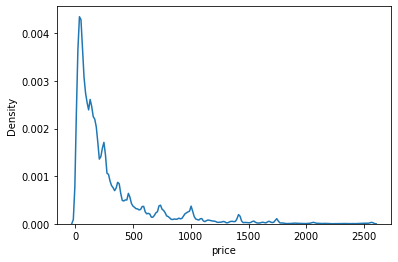

In [ ]:
sns.kdeplot(data.price)

In [ ]:
# 데이터를 카테고리 별로 묶어서 분할 

In [ ]:
category_list=list(data['large_category'].unique())

In [ ]:
category_list

[nan,
 'appliances',
 'furniture',
 'computers',
 'electronics',
 'apparel',
 'construction',
 'auto',
 'kids',
 'sport',
 'accessories',
 'medicine',
 'stationery',
 'country_yard']

In [ ]:
target_data1=data[data.large_category.isin(['electronics','appliances','computers','auto'])].reset_index(drop=True)
target_data2=data[data.large_category.isin(['furniture','construction','country_yard'])].reset_index(drop=True)
target_data3=data[data.large_category.isin(['apparel','accessories','sport'])].reset_index(drop=True)
target_data4=data[data.large_category.isin(['kids','medicine','stationery'])].reset_index(drop=True)
target_data5=data[data.large_category.isna()].reset_index(drop=True)

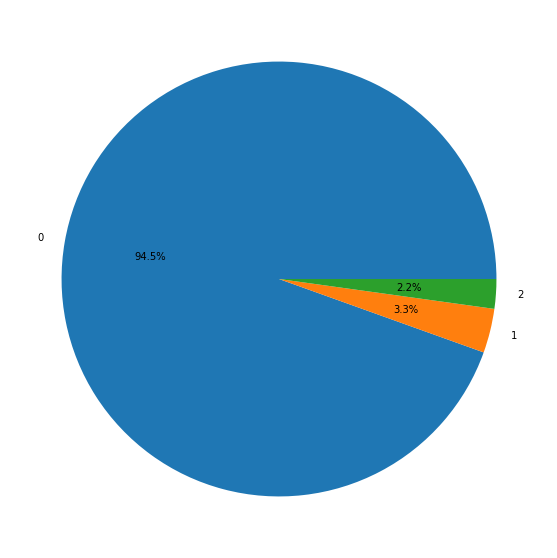

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(target_data1.target.value_counts(),labels=target_data1.target.value_counts().index,autopct='%.1f%%')
plt.show()

In [ ]:
target_data1

,event_time,user_id,product_id,large_category,small_category,brand,price,target
0,1569888000,554748717,3900821,appliances,water_heater,aqua,33,0
1,1569888001,550050854,1307067,computers,notebook,lenovo,251,0
2,1569888004,535871217,1004237,electronics,smartphone,apple,1081,0
3,1569888005,512742880,1480613,computers,desktop,pulser,908,0
4,1569888011,537918940,1004545,electronics,smartphone,huawei,566,0
...,...,...,...,...,...,...,...,...
24440244,1572566398,518956209,1004870,electronics,smartphone,samsung,275,0
24440245,1572566398,524356542,2702331,appliances,refrigerators,lg,527,0
24440246,1572566398,537931532,2300275,electronics,video,gopro,527,0
24440247,1572566398,566280422,5701038,auto,player,kenwood,128,0


In [ ]:
def preprocessing(df):
  df=df[['user_id','product_id','target']]
  df=df.drop_duplicates().reset_index(drop=True)

  return df

In [ ]:
target_data1=preprocessing(target_data1)
target_data2=preprocessing(target_data2)
target_data3=preprocessing(target_data3)
target_data4=preprocessing(target_data4)
target_data5=preprocessing(target_data5)

In [ ]:
target_data1.to_pickle('/content/drive/MyDrive/project2_2/target_data1.pkl')
target_data2.to_pickle('/content/drive/MyDrive/project2_2/target_data2.pkl')
target_data3.to_pickle('/content/drive/MyDrive/project2_2/target_data3.pkl')
target_data4.to_pickle('/content/drive/MyDrive/project2_2/target_data.pkl')
target_data5.to_pickle('/content/drive/MyDrive/project2_2/target_data1.pkl')